http://mediashow.ru/sites/default/files/books/2011/11/social.network.analysis.for_.startups.1449306462.pdf

In [10]:
import urllib

In [59]:
# Sample Data: The Russians are Coming! | 41

def read_lj_friends(g, name):
    # fetch the friend-list from LiveJournal
    response=urllib.urlopen('http://www.livejournal.com/misc/fdata.bml?user='+name)
    # walk through the lines in the response and add each one as an edge in a network
    for line in response.readlines():
        #Comments in the response start with a '#'
        #if line.startswith(bytes('#', 'utf-8')): continue
        if line.startswith('#'): continue
        
        
        # the format is "< name" (incoming) or "> name" (outgoing)
        #make sure that we don't have an empty line
        parts=line.split()
        if len(parts)==0: continue
            #add the edge to the network
        if parts[0]=='<':
            g.add_edge(parts[1],name)
        else:
            g.add_edge(name,parts[1])

In [14]:
import networkx as net
%matplotlib inline

In [57]:
g=net.Graph()

In [60]:
read_lj_friends(g,'valerois')

In [61]:
len(g) #count the number of nodes returned

308

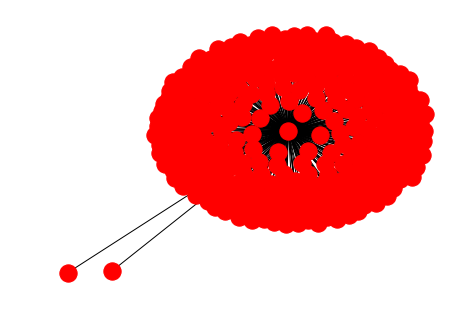

In [62]:
net.draw(g)

In [69]:
net.write_pajek(g, 'lj_friends.net')

In [68]:
g = net.read_pajek(g, 'lj_friends.net')

LookupError: unknown encoding: lj_friends.net

In [214]:
# 다운 받은 파일
g = net.read_pajek('russians.net')

In [148]:
def trim_degrees(g, degree=1):
    g2 = g.copy()
    d = net.degree(g2)
    for n in g2.nodes():
        if d[n] <= degree:
            g2.remove_node(n)
    return g2

In [149]:
core = trim_degrees(g)

In [144]:
len(core)

25905

In [150]:
len(g)

87250

In [151]:
deg = net.degree(g)

In [152]:
deg

{u'svalerievna': 1,
 u'maly_na': 1,
 u'koradokosta': 1,
 u'reinkarni': 2,
 u'cartoonka': 1,
 u'prihodi_smotri': 1,
 u'pocket_girl': 4,
 u'riendespe': 1,
 u'musechka': 1,
 u'chijulia': 1,
 u'blga': 1,
 u'gogokostik': 1,
 u'hieroglyph_elle': 1,
 u'demettry': 1,
 u'nata_f_e_ya': 4,
 u'saburay': 1,
 u'idealsummer': 1,
 u'cedov_cergey': 1,
 u'kharkov_toronto': 1,
 u'money4you': 6,
 u'sushka_gim': 1,
 u'slayerovich': 2,
 u'azzy_kikoz': 1,
 u'e_koala': 2,
 u'indeezzz': 1,
 u'lyamba': 1,
 u'fekla13': 1,
 u'emaslova': 2,
 u'stepnoy_lis': 1,
 u'murik_555': 1,
 u'sonnyk': 2,
 u'sakura_nu': 2,
 u'liwingston': 1,
 u'yuriyk': 2,
 u'taksus': 1,
 u'von_tageslicht': 1,
 u'dionte_zicarel': 1,
 u'lovesexandmoney': 1,
 u'span4bob': 1,
 u'ivar59': 2,
 u'poupee_russe': 1,
 u'liana_23b': 1,
 u'kipriena': 1,
 u'azuresky2006': 2,
 u'mary_tudor': 1,
 u'vivisin': 5,
 u'zakazfromusa': 1,
 u'angelita24': 1,
 u'valja_vorobjoff': 1,
 u'notolya': 1,
 u'mr_rrr': 1,
 u'monsenor': 1,
 u'xerasse': 1,
 u'no_lullaby': 1,
 

In [153]:
deg['valerois']

232

In [154]:
min(deg.values())

1

In [155]:
max(deg.values())

4691

In [156]:
def sorted_map(map):
    return sorted(map.iteritems(), key=lambda(k, v): (-v, k))

In [157]:
sorted_map(deg)[:7]

[(u'borisakunin', 4691),
 (u'doctor_liza', 3046),
 (u'tareeva', 2970),
 (u'cheger', 2887),
 (u'karial', 2717),
 (u'snorapp', 2707),
 (u'masha_koroleva', 2683)]

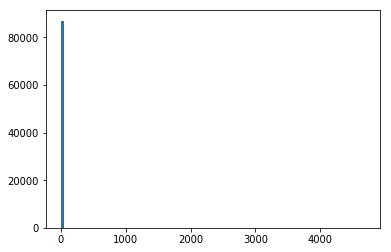

In [180]:
h = plt.hist(sorted(deg.values()), bins=100)

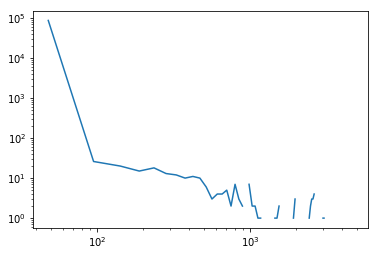

In [181]:
plt.loglog(h[1][1:], h[0])

In [172]:
len(bins)

101

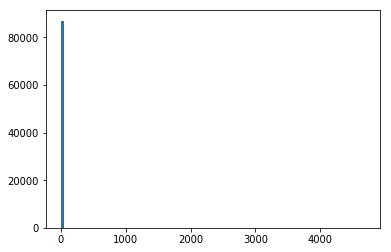

In [182]:
n, bins, patches = plt.hist(sorted(deg.values()), bins=100)

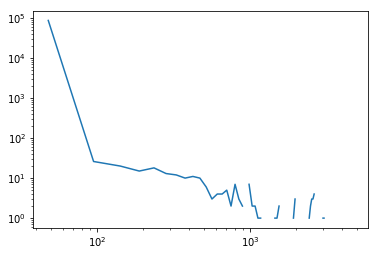

In [204]:
# x축-bins[1:], y축-n
plt.loglog(bins[1:], n)

In [209]:
import numpy as np

In [211]:
np.log10(1)

0.0

In [158]:
import matplotlib.pyplot as plt

In [159]:
len(deg.values())

87250

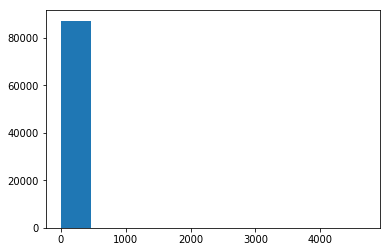

In [160]:
h = plt.hist(deg.values(), bins=10)

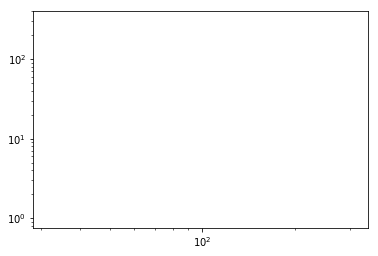

In [139]:
plt.loglog(h[1][1:], h[0])

In [108]:
len(h[0])

100

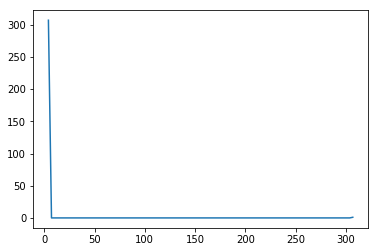

In [37]:
plt.plot(h[1][1:], h[0])